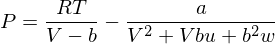

In [3]:
import sympy as sym
sym.init_printing(pretty_print=True)
from IPython.display import display

V,a,b,R,T,u,w = sym.symbols('V,a,b,R,T,u,w')

P=R*T/(V-b)-a/(V**2+u*b*V+w*b**2)

display(sym.Eq(sym.symbols('P'),P))

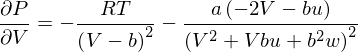

In [4]:
dP=sym.diff(P,V)

display(sym.Eq(sym.symbols(r'\frac{\partial{P}}{\partial{V}}'),dP))

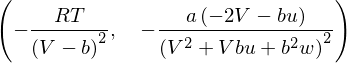

In [5]:
display(dP.args)

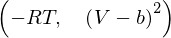

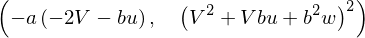

In [7]:
display(sym.fraction(dP.args[0]))
display(sym.fraction(dP.args[1]))

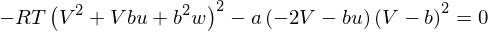

In [8]:
n1=sym.fraction(dP.args[0])[0]
n2=sym.fraction(dP.args[1])[0]
d1=sym.fraction(dP.args[0])[1]
d2=sym.fraction(dP.args[1])[1]

Zero=n1*d2+n2*d1
display(sym.Eq(Zero,0))

In [20]:
expr=sym.expand(Zero)
display(expr)

In [10]:
col=sym.collect(expr,V)
display(col)

In [13]:
for i in range(4,-1,-1):
    print("c",i,"=", col.coeff(V,i)/col.coeff(V,4))

c 4 = 1
c 3 = -(-2*R*T*b*u + 2*a)/(R*T)
c 2 = -(-R*T*b**2*u**2 - 2*R*T*b**2*w + a*b*u - 4*a*b)/(R*T)
c 1 = -(-2*R*T*b**3*u*w - 2*a*b**2*u + 2*a*b**2)/(R*T)
c 0 = -(-R*T*b**4*w**2 + a*b**3*u)/(R*T)
